## Observations and Insights 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import os

In [48]:
# Study data files
mouse_metadata_path = os.path.join("data", "Mouse_metadata.csv")
study_results_path = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

mouse_study_df.head(10)
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [49]:
# Checking the number of mice.
num_mice = mouse_study_df['Mouse ID'].nunique()
print(f"The number of mouse IDs is: {num_mice} (including duplicates)")

The number of mouse IDs is: 249 (including duplicates)


In [50]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df['Mouse ID'][mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [51]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df[mouse_study_df['Mouse ID']=='g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df.drop(labels = mouse_study_df.loc[mouse_study_df['Mouse ID']=='g989'].index, inplace =True)


In [53]:
# Checking the number of mice in the clean DataFrame.
no_dup_num_mice = mouse_study_df["Mouse ID"].nunique()
print(f"The number of mouse IDs is: {no_dup_num_mice} (duplicates REMOVED)")

The number of mouse IDs is: 248 (duplicates REMOVED)


## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_study_group = mouse_study_df.groupby(['Drug Regimen'])

means = mouse_study_group['Tumor Volume (mm3)'].mean()
medians = mouse_study_group['Tumor Volume (mm3)'].median()
variances = mouse_study_group['Tumor Volume (mm3)'].var()
std_devs = mouse_study_group['Tumor Volume (mm3)'].std()
sems = mouse_study_group['Tumor Volume (mm3)'].sem()

tumor_vol_sum_table = pd.DataFrame({
    'Mean Tumor Volume (mm3)': means,
    'Median Tumor Volume (mm3)': medians,
    'Variance': variances,
    'Standard Deviation': std_devs,
    'SEM': sems
})

tumor_vol_sum_table.sort_values(by='Mean Tumor Volume (mm3)', ascending = True)


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor_vol_sum_table = mouse_study_group.agg(Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'), Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'), Variance=('Tumor Volume (mm3)', 'var'), Std_dev=('Tumor Volume (mm3)', 'std'), SEM = ('Tumor Volume (mm3)', 'sem'))


agg_tumor_vol_sum_table.sort_values(by='Mean_Tumor_Volume', ascending=True)


,Mean_Tumor_Volume,Median_Tumor_Volume,Variance,Std_dev,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

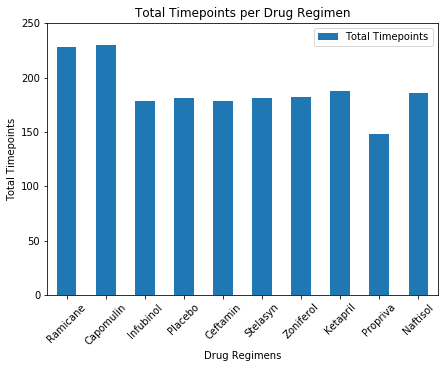

In [56]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_names = mouse_study_df['Drug Regimen'].unique()
total_timepoints = [mouse_study_df[mouse_study_df['Drug Regimen'] == drug]['Timepoint'].count() for drug in drug_names]

timestamps= pd.DataFrame({
    'Drug Regimens': drug_names,
    'Total Timepoints': total_timepoints
})

ax = timestamps.plot(kind='bar',x='Drug Regimens', y='Total Timepoints', rot=45, figsize=(7,5))
ax.set_ylim(0,250)
ax.set_ylabel('Total Timepoints')
ax.set_title("Total Timepoints per Drug Regimen")
plt.show()

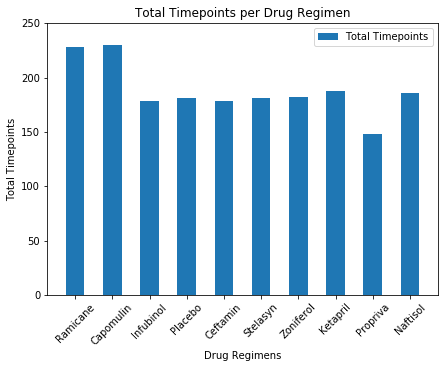

In [57]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# create x axis values as numpy array 
x_axis = np.arange(len(drug_names))

# convert numpy array x axis into a standard list for set_xticks
tick_locations = [val for val in x_axis]

# Generate plot
fig, ax = plt.subplots(1,1, figsize=(7,5))

ax.bar(x=x_axis, height=total_timepoints, align='center', width=0.5, alpha=1)


# configure x-axis
ax.set_xticks(tick_locations)
ax.set_xticklabels(drug_names, rotation= 45)
ax.set_xlim(-0.75, len(x_axis)-0.25)
ax.set_xlabel("Drug Regimens")

# configure y-axis
ax.set_ylim(0, 250)
ax.set_ylabel("Total Timepoints")

ax.set_title("Total Timepoints per Drug Regimen")
ax.legend(['Total Timepoints'], loc='best')

plt.show()

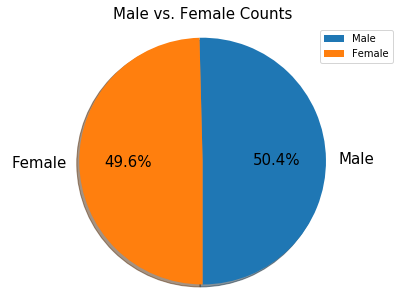

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
males_count = mouse_study_df[mouse_study_df['Sex']=='Male']['Mouse ID'].nunique()
females_count = mouse_study_df[mouse_study_df['Sex']=='Female']['Mouse ID'].nunique()

sex_df = pd.DataFrame({
    'Count': [males_count, females_count]
}, index=['Male', 'Female'])

sex_df.plot(kind='pie', y='Count', autopct="%1.1f%%", shadow=True, figsize=(7,5), fontsize=15, startangle=270)
plt.ylabel('')
plt.title("Male vs. Female Counts", fontsize = 15)
plt.axis('equal')
plt.show()

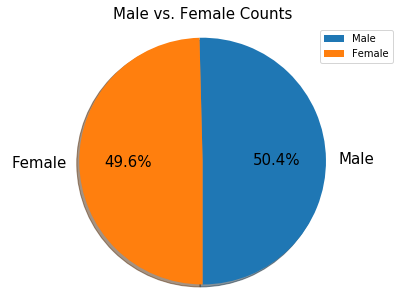

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
counts = [males_count, females_count]

fig, ax = plt.subplots(1,1, figsize = (7,5))

ax.pie(counts, labels = labels, autopct='%1.1f%%', shadow =True, textprops={'fontsize': 15}, startangle=270)
ax.set_title("Male vs. Female Counts", fontsize=15)
ax.legend(labels)
ax.axis('equal')


plt.show()

## Quartiles, Outliers and Boxplots

In [122]:
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

positive_regimens_df = mouse_study_df[mouse_study_df['Drug Regimen'].isin(drug_regimens)]

positive_regimes_df = positive_regimens_df.drop_duplicates(subset='Mouse ID', keep='last')

positive_regimes_df.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'})

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# positive_regimens_df = mouse_study_df[mouse_study_df['Drug Regimen'].isin(drug_regimens)]

# mouse_ids = positive_regimens_df['Mouse ID'].unique()

# final_tumor_vol_df = pd.DataFrame({
#     'Mouse ID': [],
#     'Final Tumor Volume': []
# })

# for mouse in mouse_ids:
#     final_tumor_vol = positive_regimens_df[positive_regimens_df['Mouse ID'] == mouse]['Tumor Volume (mm3)'].iloc[-1]

#     final_tumor_vol_df = final_tumor_vol_df.append({'Mouse ID': mouse, 'Final Tumor Volume': final_tumor_vol}, ignore_index=True)


# # Start by getting the last (greatest) timepoint for each mouse


# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# final_pos_reg_df = pd.merge(mouse_study_df, final_tumor_vol_df, on='Mouse ID')
# final_pos_reg_df['Timepoint'].unique()


array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
